In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Load a file by ID and create local file.
downloaded = drive.CreateFile({'id':'10GIu97rFba9y-JhhYuH0x2d1IBaZHwYg'}) # replace fileid with Id of file you want to access
downloaded.GetContentFile('heart.csv') # now you can use export.csv 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
heartDisease = pd.read_csv('heart.csv')
data = heartDisease
heartDisease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heartDisease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


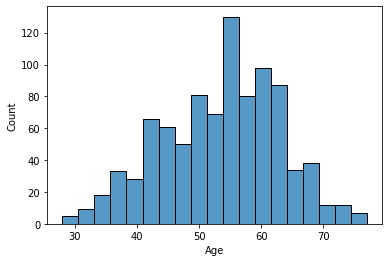

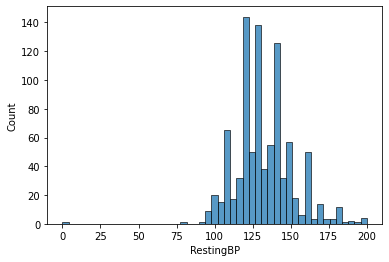

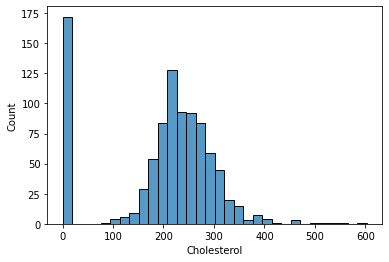

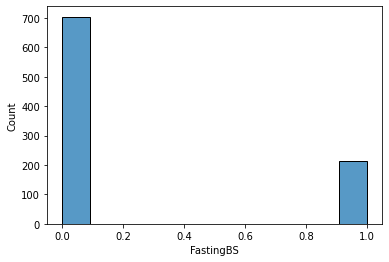

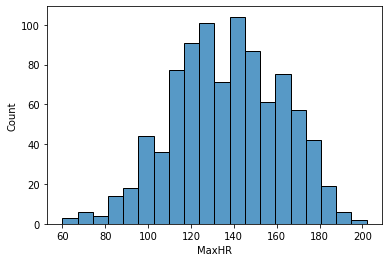

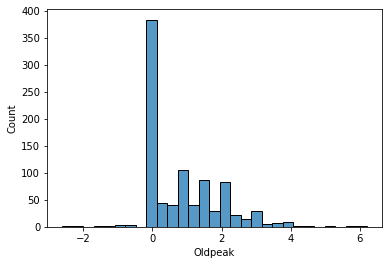

In [ ]:
numericAtt= heartDisease.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
categoricAtt = heartDisease.select_dtypes('object').columns

for columns in heartDisease[numericAtt]:
  sns.histplot(x = columns, data = heartDisease)
  plt.show()


In [ ]:
pearsoncorr = heartDisease.corr(method = 'pearson')
pearsoncorr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
sex = heartDisease.groupby('Sex')['HeartDisease'].mean().sort_values(ascending=False)
sex

Sex
M    0.631724
F    0.259067
Name: HeartDisease, dtype: float64

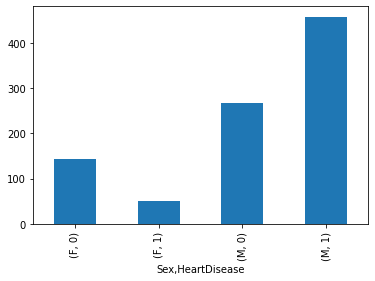

In [ ]:
heartDiseaseTemp = heartDisease.groupby(['Sex','HeartDisease']).size()
heartDiseaseTemp.plot(kind = 'bar')

In [ ]:
chestPainType = heartDisease.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)
chestPainType

ChestPainType
ASY    0.790323
TA     0.434783
NAP    0.354680
ATA    0.138728
Name: HeartDisease, dtype: float64

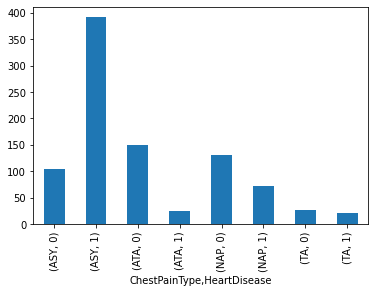

In [ ]:
heartDiseaseTemp = heartDisease.groupby(['ChestPainType','HeartDisease']).size()
heartDiseaseTemp.plot(kind = 'bar')

In [ ]:
restingECG = heartDisease.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)
restingECG

RestingECG
ST        0.657303
LVH       0.563830
Normal    0.516304
Name: HeartDisease, dtype: float64

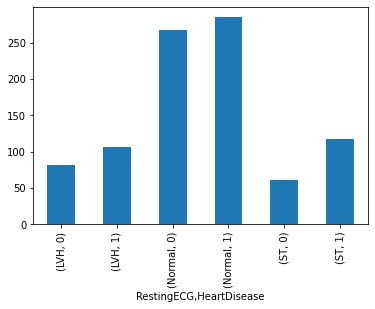

In [ ]:
heartDiseaseTemp = heartDisease.groupby(['RestingECG','HeartDisease']).size()
heartDiseaseTemp.plot(kind = 'bar')

In [ ]:
exerciseAngina = heartDisease.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)
exerciseAngina

ExerciseAngina
Y    0.851752
N    0.351005
Name: HeartDisease, dtype: float64

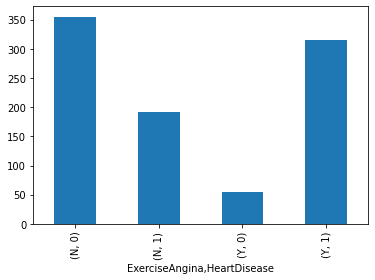

In [ ]:
heartDiseaseTemp = heartDisease.groupby(['ExerciseAngina','HeartDisease']).size()
heartDiseaseTemp.plot(kind = 'bar')

In [ ]:
STSlope = heartDisease.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)
STSlope

ST_Slope
Flat    0.828261
Down    0.777778
Up      0.197468
Name: HeartDisease, dtype: float64

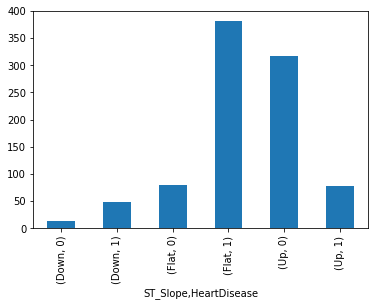

In [ ]:
heartDiseaseTemp = heartDisease.groupby(['ST_Slope','HeartDisease']).size()
heartDiseaseTemp.plot(kind = 'bar')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
attributes = data.drop("HeartDisease" , axis = 1).values
disease = data['HeartDisease'].values
Encoder = OneHotEncoder()
Encoder.fit(attributes)
attributes = Encoder.transform(attributes).toarray()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(attributes,disease,stratify = disease, random_state=42,test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50,2)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
nNeighbors = knn_gscv.best_params_.get('n_neighbors')
print("Best number neighbors n: ", nNeighbors)

Best number neighbors n:  19


In [ ]:
knn = KNeighborsClassifier(n_neighbors=nNeighbors)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(knn.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8858695652173914
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        82
           1       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

[[69 13]
 [ 8 94]]
